Insights:
- plotar todas as variáveis com aquele gráfico do prof da aula de árvores (taxa de evento x feature) X
- analisar as features que são relevantes, separam bem X
- rodar uma cross validation para tentar melhor as métricas
- puxar uma curva roc pra tentar definir um com trasholder (perguntar pro gpt)

# TRATAMENTO DOS DADOS

In [2]:
#importing library
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#carregando o dataframe
file_path = '/content/drive/MyDrive/Colab Notebooks/bank-additional-full.csv'
df=pd.read_csv(file_path,delimiter=';')

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
# estatística descritiva
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
# substituindo '.' por '_' nas colunas
df.columns = df.columns.str.replace(".", "_")

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
# Transformar y em booleano
df['y'] = df['y'].map({'yes': True, 'no': False})

**Análises Exploratórias**

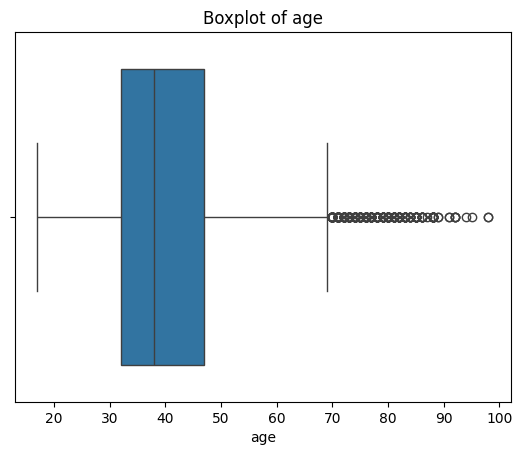

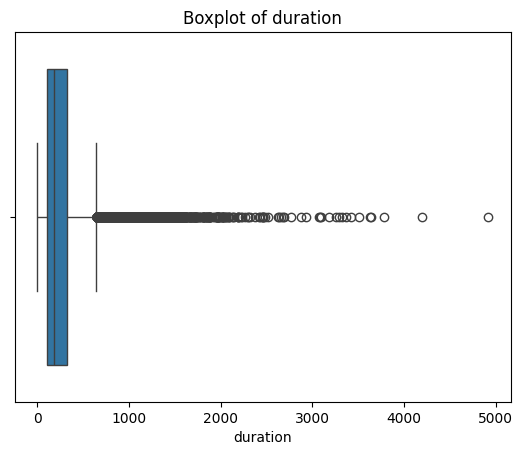

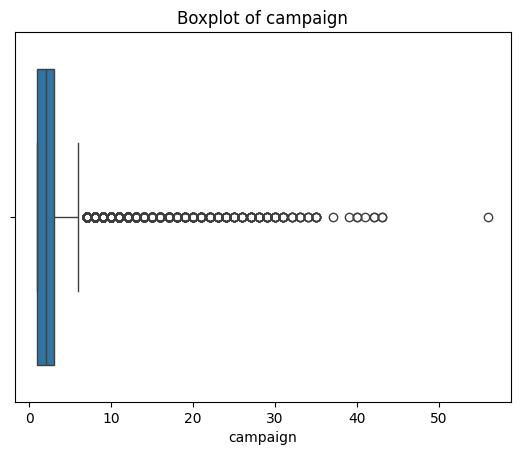

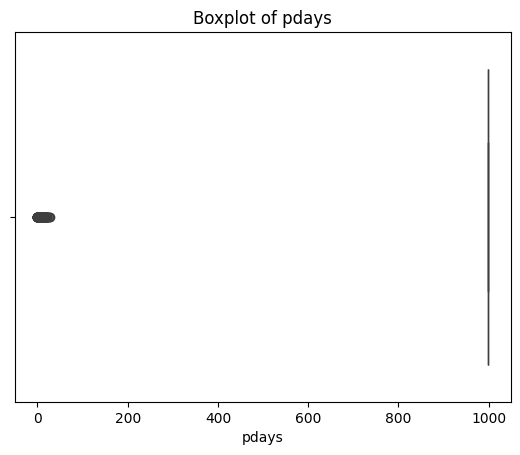

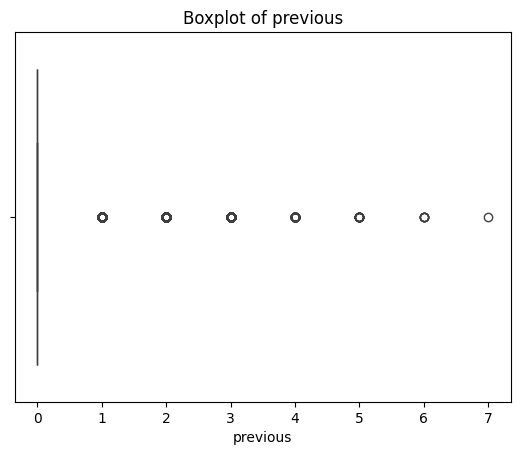

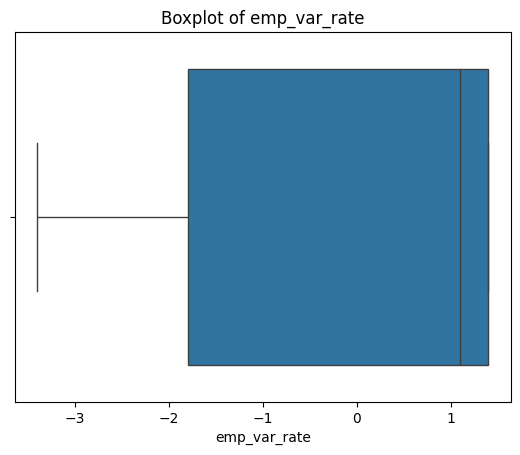

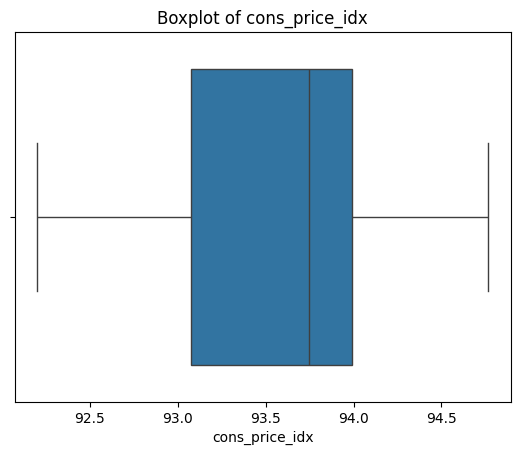

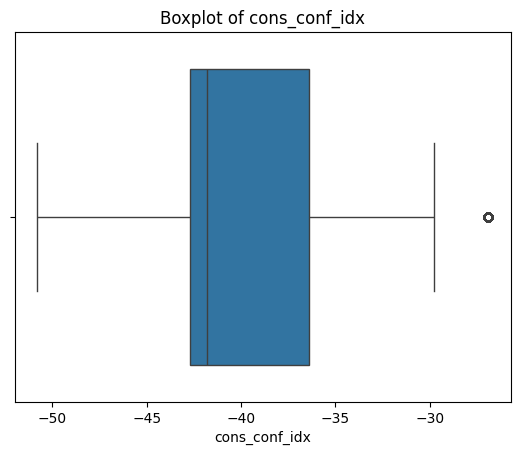

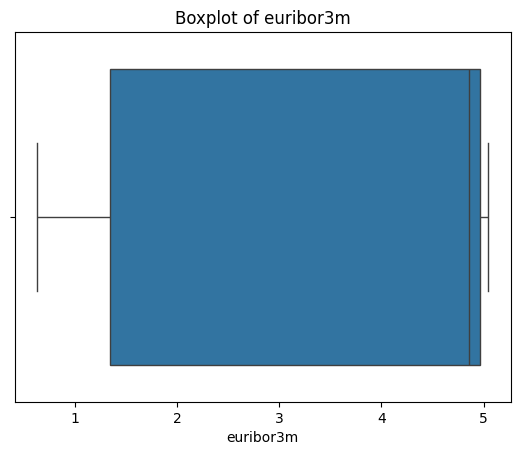

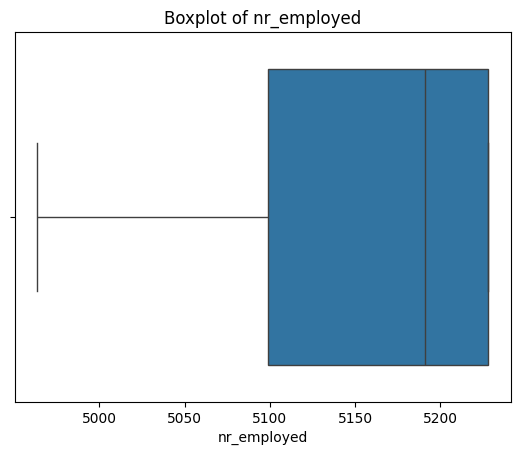

In [7]:
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
for feature in numeric_features:
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


In [8]:
def descritiva(df_, var, vresp='y', max_classes=5):
    """
    Gera um gráfico descritivo da taxa do evento por categoria da variável especificada.
    """

    df = df_.copy()

    if pd.api.types.is_numeric_dtype(df[var]) and df[var].nunique() > max_classes:
        df[var] = pd.qcut(df[var], max_classes, duplicates='drop')

    fig, ax1 = plt.subplots(figsize=(10, 6))

    sns.pointplot(data=df, y=vresp, x=var, ax=ax1)

    # Criar o segundo eixo y para a taxa de evento
    ax2 = ax1.twinx()
    sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)
    ax2.set_ylabel('Frequência', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    ax1.set_zorder(2)
    ax1.patch.set_visible(False)  # Tornar o fundo do eixo 1 transparente

    # Rotacionar os rótulos do eixo x no eixo principal
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

    # Exibir o gráfico
    plt.show()

Analisando a variável: age


<ipython-input-8-783ff43c5dcb>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)
<ipython-input-8-783ff43c5dcb>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


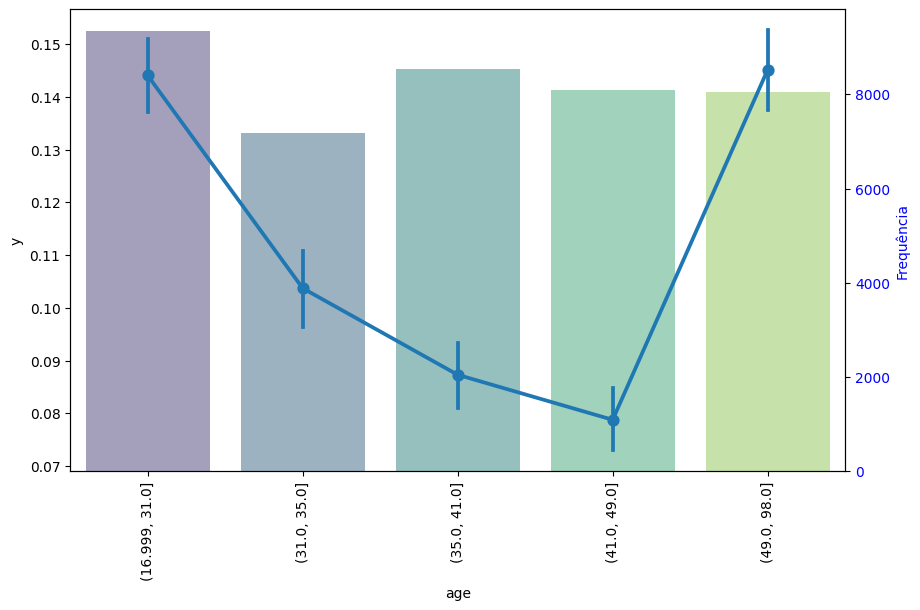

Analisando a variável: job


<ipython-input-8-783ff43c5dcb>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)
<ipython-input-8-783ff43c5dcb>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


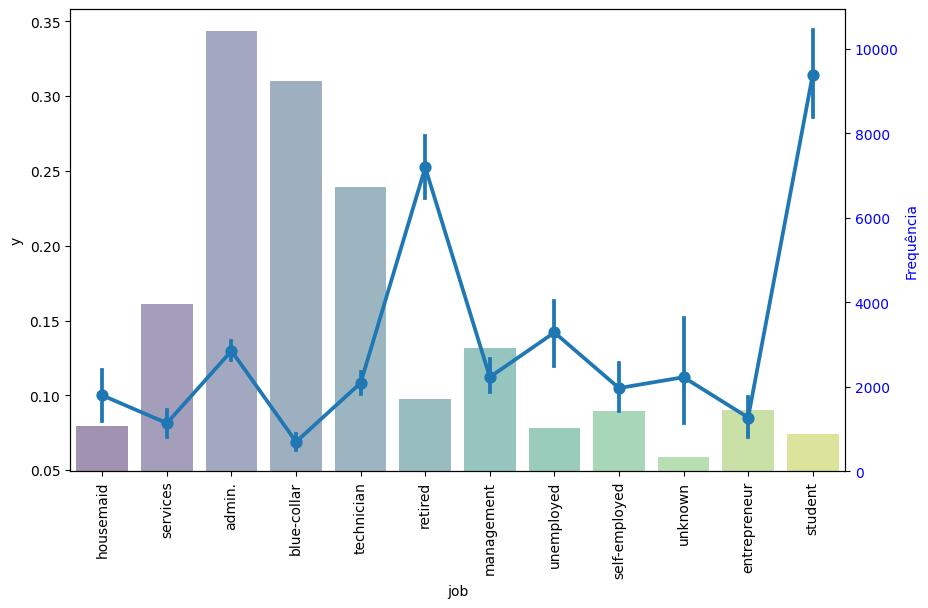

Analisando a variável: marital


<ipython-input-8-783ff43c5dcb>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)
<ipython-input-8-783ff43c5dcb>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


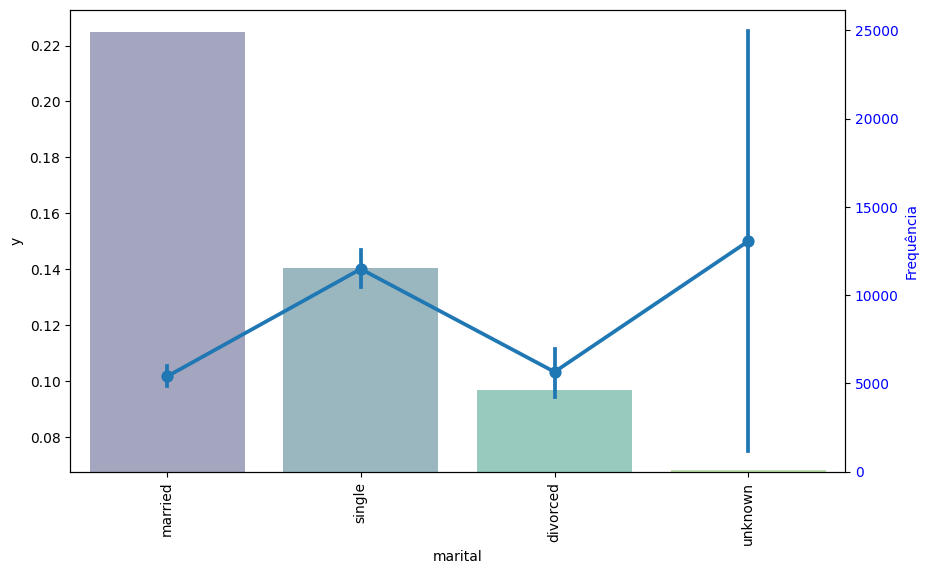

Analisando a variável: education


<ipython-input-8-783ff43c5dcb>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)
<ipython-input-8-783ff43c5dcb>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


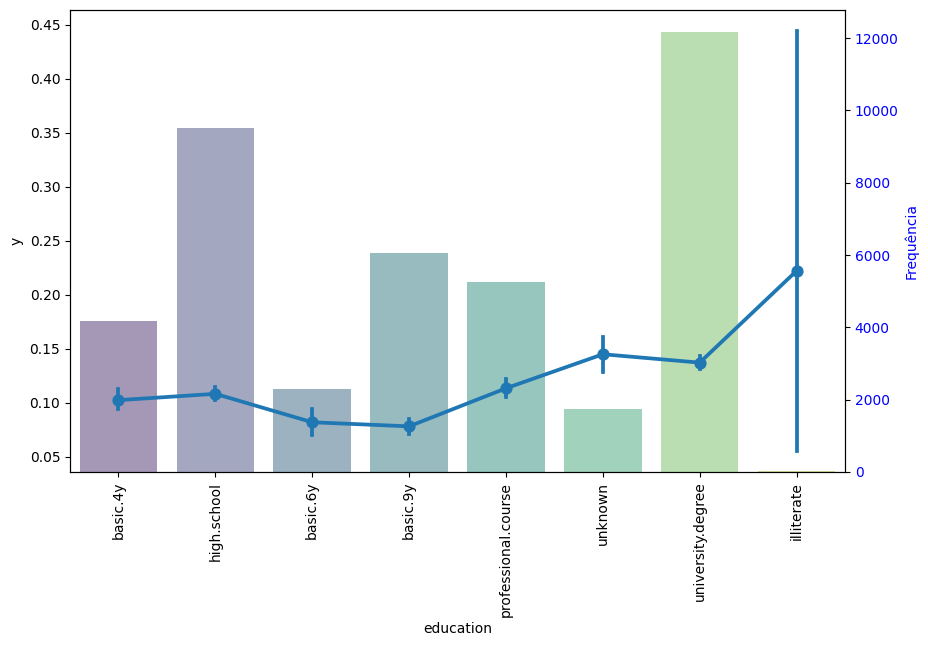

Analisando a variável: default


<ipython-input-8-783ff43c5dcb>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)
<ipython-input-8-783ff43c5dcb>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


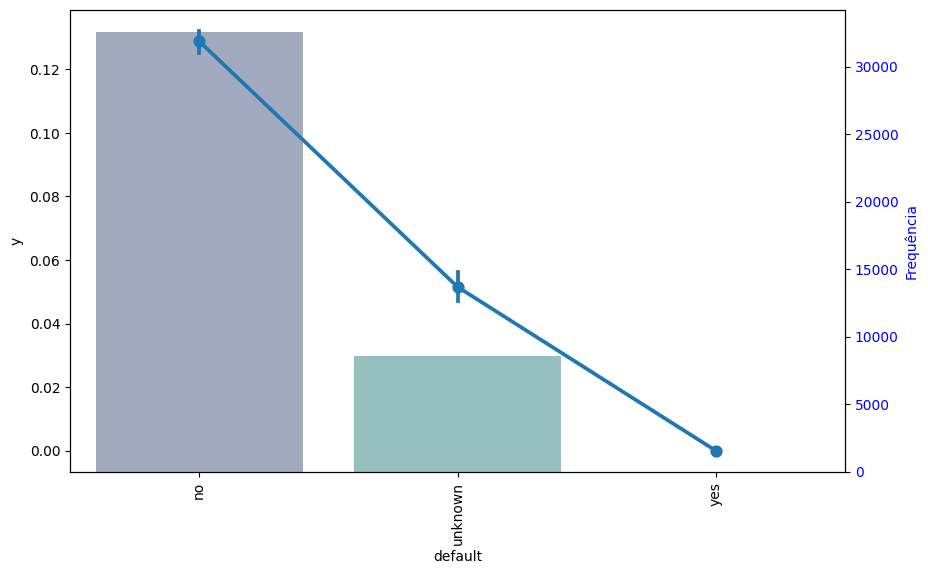

Analisando a variável: housing


<ipython-input-8-783ff43c5dcb>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)
<ipython-input-8-783ff43c5dcb>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


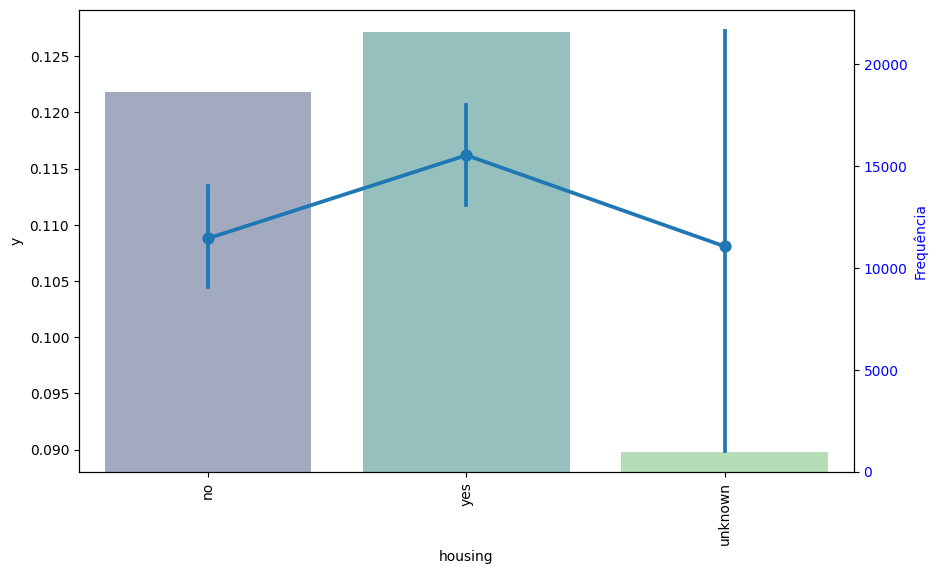

Analisando a variável: loan


<ipython-input-8-783ff43c5dcb>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)
<ipython-input-8-783ff43c5dcb>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


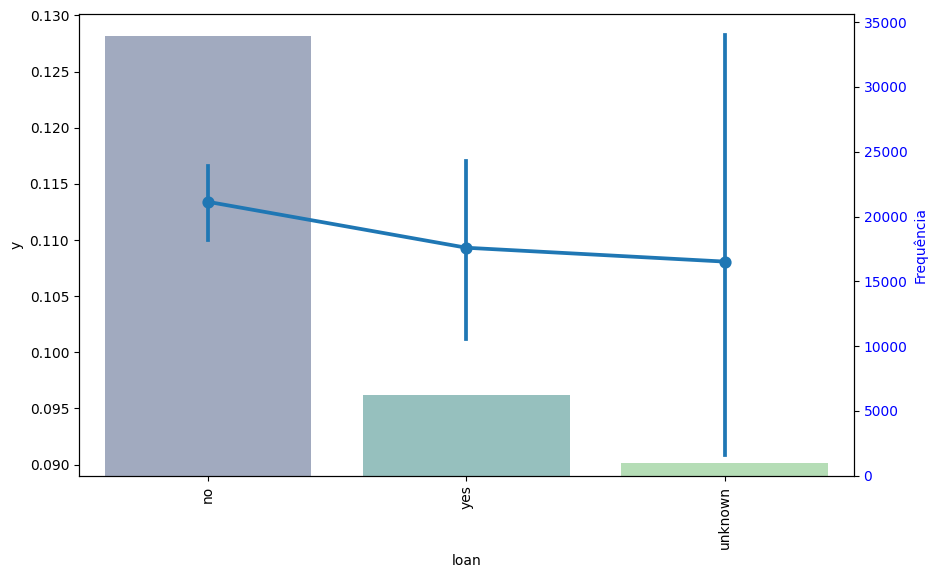

Analisando a variável: contact


<ipython-input-8-783ff43c5dcb>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)
<ipython-input-8-783ff43c5dcb>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


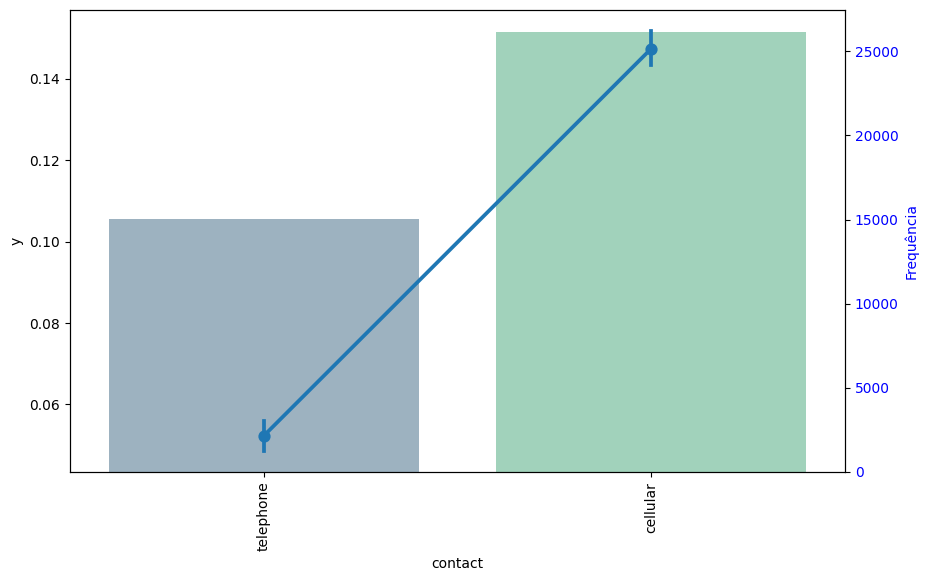

Analisando a variável: month


<ipython-input-8-783ff43c5dcb>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)
<ipython-input-8-783ff43c5dcb>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


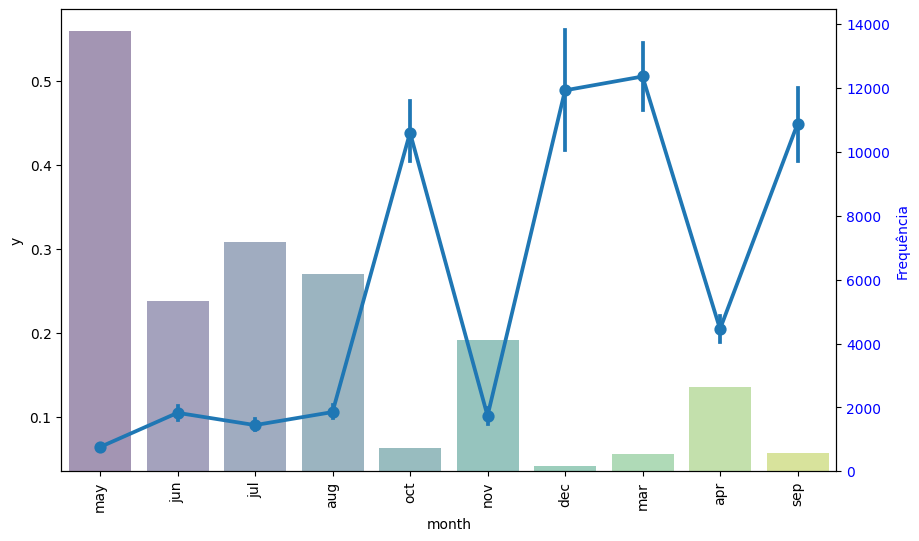

Analisando a variável: day_of_week


<ipython-input-8-783ff43c5dcb>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)
<ipython-input-8-783ff43c5dcb>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


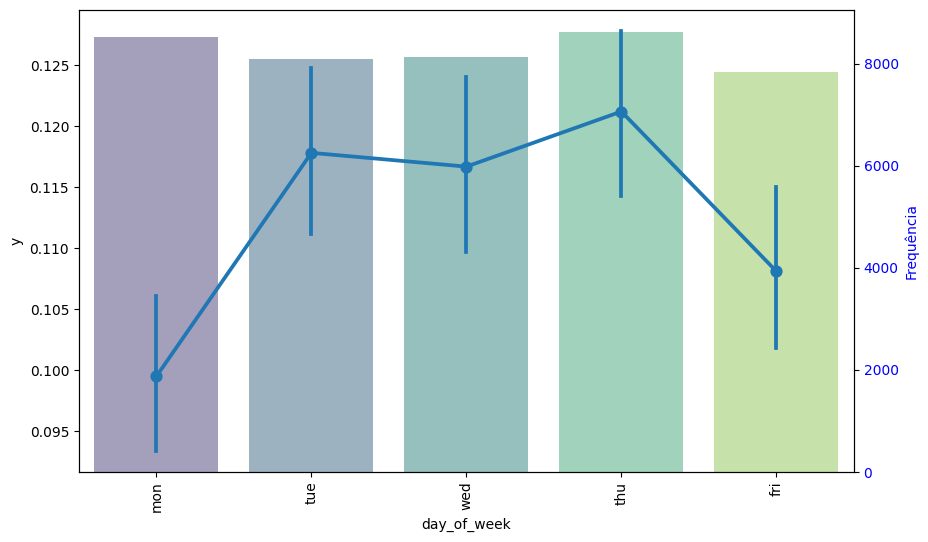

Analisando a variável: duration


<ipython-input-8-783ff43c5dcb>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)
<ipython-input-8-783ff43c5dcb>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


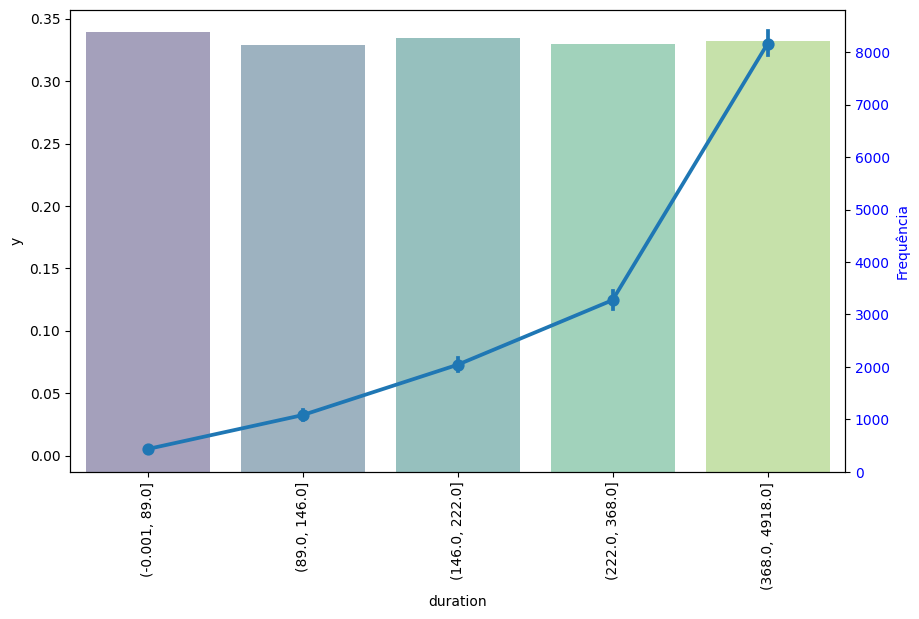

Analisando a variável: campaign


<ipython-input-8-783ff43c5dcb>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)
<ipython-input-8-783ff43c5dcb>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


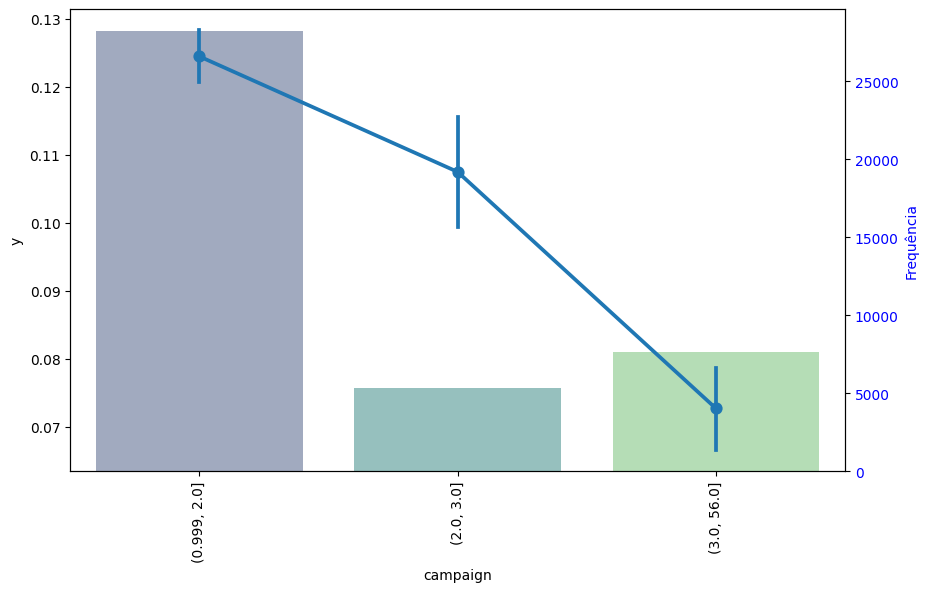

Analisando a variável: pdays


<ipython-input-8-783ff43c5dcb>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)
<ipython-input-8-783ff43c5dcb>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


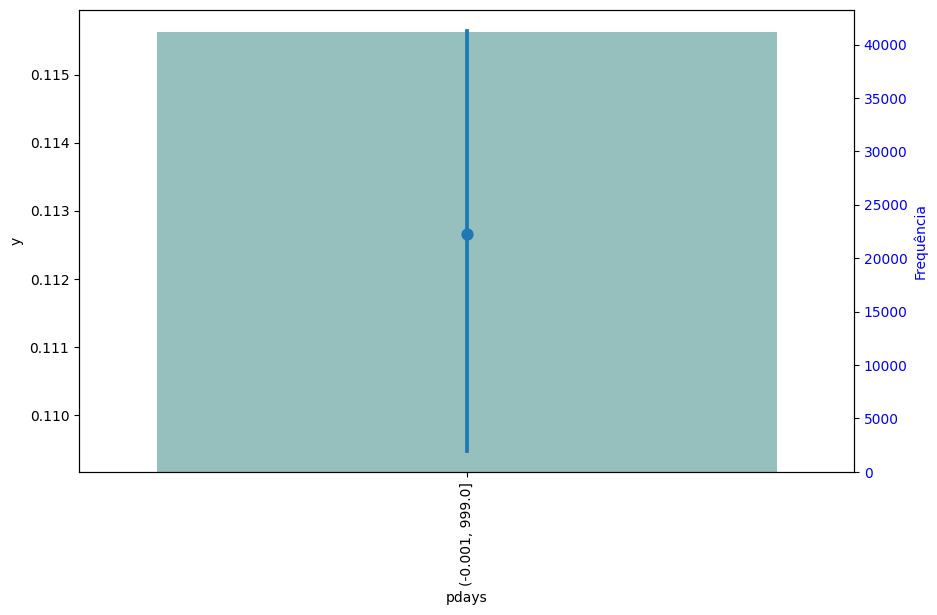

Analisando a variável: previous


<ipython-input-8-783ff43c5dcb>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)
<ipython-input-8-783ff43c5dcb>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


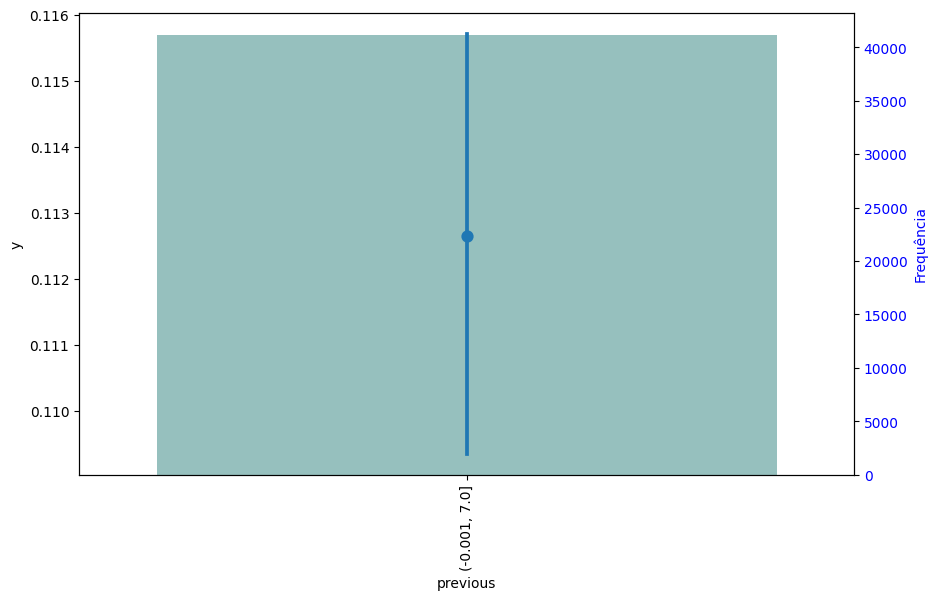

Analisando a variável: poutcome


<ipython-input-8-783ff43c5dcb>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)
<ipython-input-8-783ff43c5dcb>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


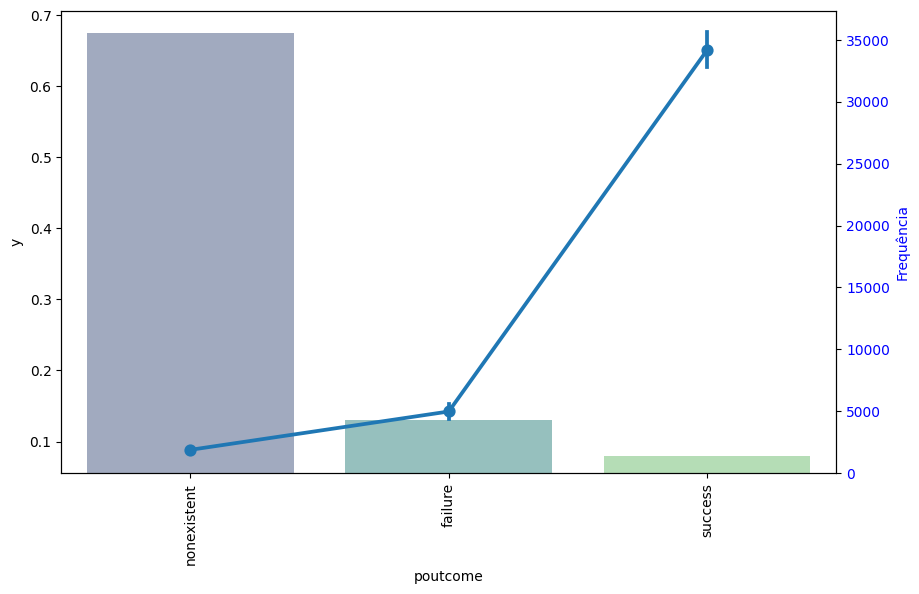

Analisando a variável: emp_var_rate


<ipython-input-8-783ff43c5dcb>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)
<ipython-input-8-783ff43c5dcb>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


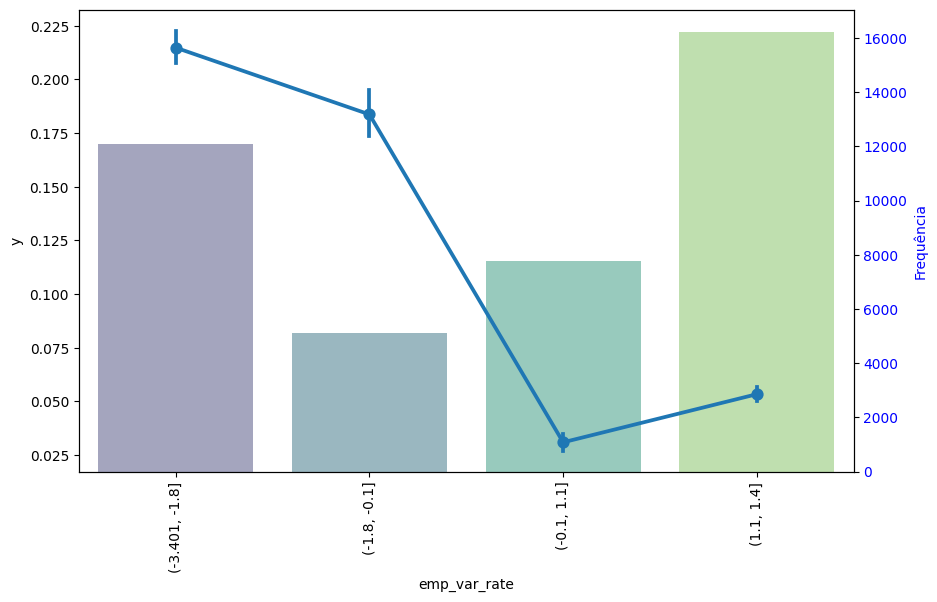

Analisando a variável: cons_price_idx


<ipython-input-8-783ff43c5dcb>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)
<ipython-input-8-783ff43c5dcb>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


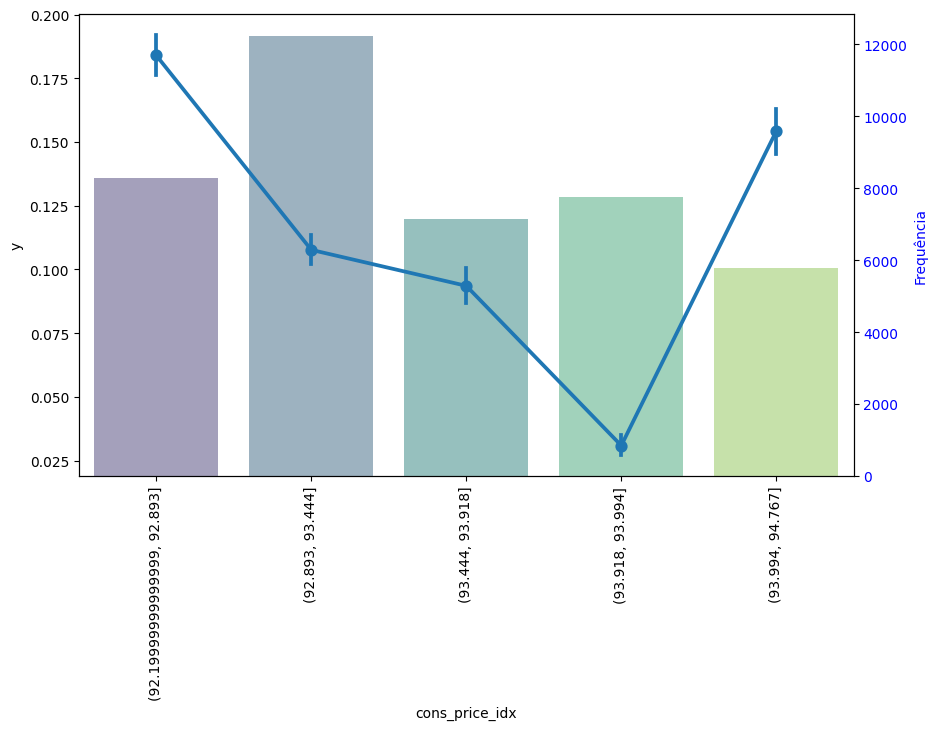

Analisando a variável: cons_conf_idx


<ipython-input-8-783ff43c5dcb>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)
<ipython-input-8-783ff43c5dcb>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


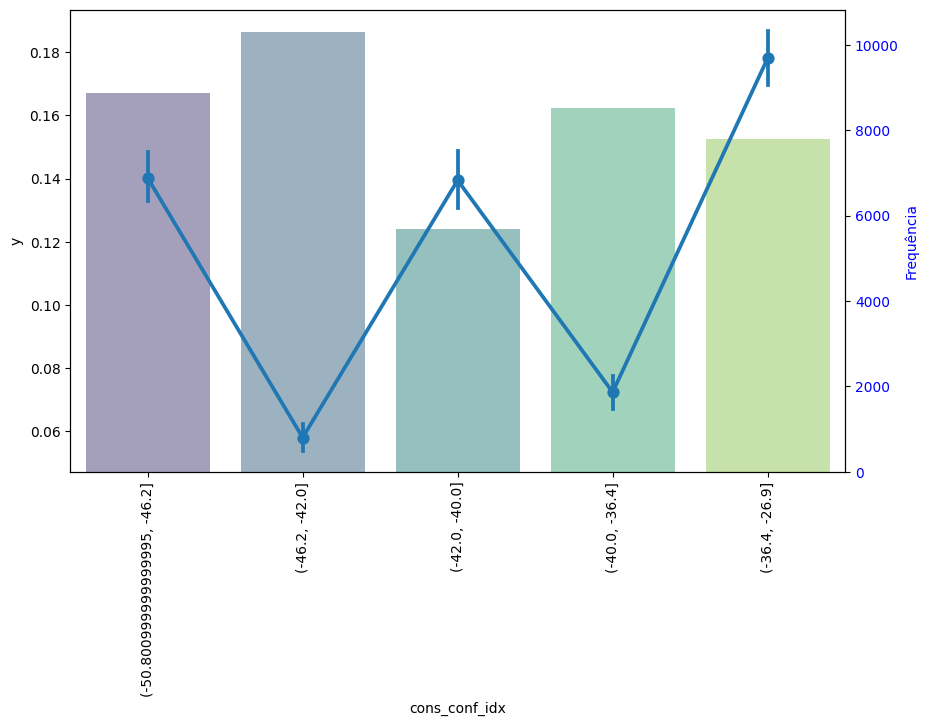

Analisando a variável: euribor3m


<ipython-input-8-783ff43c5dcb>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)
<ipython-input-8-783ff43c5dcb>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


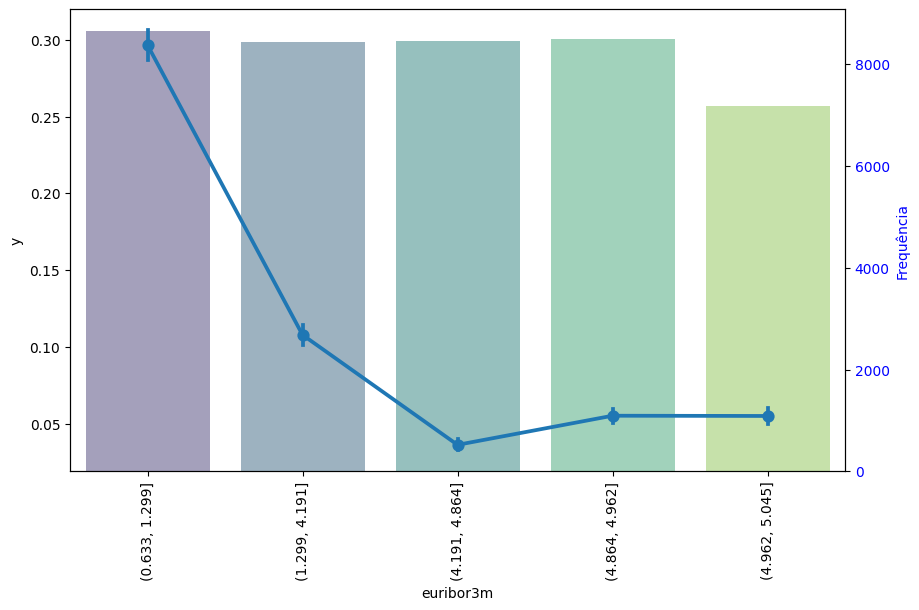

Analisando a variável: nr_employed


<ipython-input-8-783ff43c5dcb>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)
<ipython-input-8-783ff43c5dcb>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


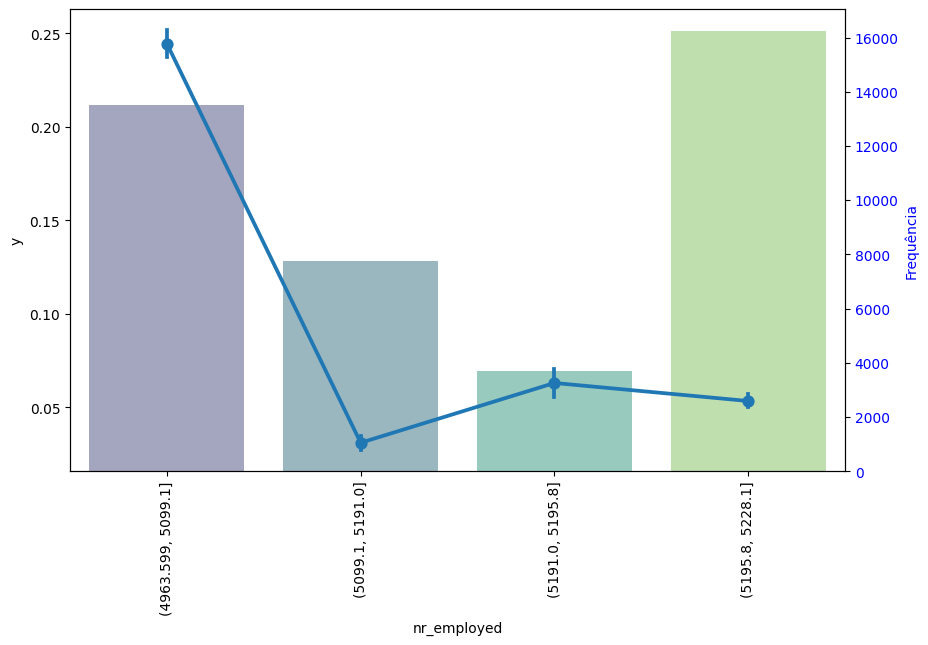

In [9]:
# Iterar sobre todas as colunas categóricas, excluindo a variável target 'y'
for column in df.columns:
    if column != 'y':
        print(f"Analisando a variável: {column}")
        descritiva(df, column, vresp='y', max_classes=5)


In [10]:
columns = ['marital', 'education', 'housing', 'loan', 'pdays']

for column in columns:
    print(f"Análise da coluna: {column}")
    result = df.groupby(column).agg(
        y_true_count=('y', lambda x: x.sum()),  # Soma de y=True
        total_count=('y', lambda x: x.count())  # Contagem total
    )
    print(result)
    print()


Análise da coluna: marital
          y_true_count  total_count
marital                            
divorced           476         4612
married           2532        24928
single            1620        11568
unknown             12           80

Análise da coluna: education
                     y_true_count  total_count
education                                     
basic.4y                      428         4176
basic.6y                      188         2292
basic.9y                      473         6045
high.school                  1031         9515
illiterate                      4           18
professional.course           595         5243
university.degree            1670        12168
unknown                       251         1731

Análise da coluna: housing
         y_true_count  total_count
housing                           
no               2026        18622
unknown           107          990
yes              2507        21576

Análise da coluna: loan
         y_true_count  total_

**Tratamento dos dados pós análises exploratórias**

In [11]:
df['y'].value_counts()

,count
y,
False,36548
True,4640


In [12]:
df['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [13]:
# transformando 999 em 0 já que nao houve contato
df['pdays'] = df['pdays'].replace({999:0})

In [14]:
df.replace('unknown', np.nan, inplace=True)
print(df.isna().sum()/len(df)*100)

age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp_var_rate       0.000000
cons_price_idx     0.000000
cons_conf_idx      0.000000
euribor3m          0.000000
nr_employed        0.000000
y                  0.000000
dtype: float64


In [14]:
df["default"].value_counts(normalize=True)*100

,proportion
default,
no,99.990795
yes,0.009205


In [15]:
print(df.isna().sum())

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp_var_rate         0
cons_price_idx       0
cons_conf_idx        0
euribor3m            0
nr_employed          0
y                    0
dtype: int64


In [15]:
# como a variavel default apresenta uma variância muito pequena e com muitos valores nulos, vamos removê-la
df_cleaned = df.drop('default', axis=1)

In [16]:
# tratando missing values: como temos valores nulos para variáveis categóricas, optei por imputar a moda já que árvores não são muito sensíveis a essa metodologia
for column in ['job', 'marital', 'education', 'housing', 'loan']:
    df_cleaned[column] = df_cleaned[column].fillna(df_cleaned[column].mode()[0])

In [18]:
# checando os tratamentos de nulls
print(df_cleaned.isna().sum())

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64


In [17]:
def onehot_encode(df,columns):
    df=df.copy()
    for column in columns:
        dummies=pd.get_dummies(df[column],prefix=column, drop_first=True).astype(int)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    return df

In [18]:
nominal_feature=['job','marital','education','poutcome', 'contact']

binary_feature=['housing','loan']

ordinal_feature=['day_of_week','month']

In [19]:
# verificando os valores das colunas ordinárias
for column in ordinal_feature:
    values = df_cleaned[column].unique()
    print(values)

['mon' 'tue' 'wed' 'thu' 'fri']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


In [20]:
# transformando variáveis ordinais em valores numéricos
day_mapping = {
    'mon': 1,
    'tue': 2,
    'wed': 3,
    'thu': 4,
    'fri': 5
}
df_cleaned['day_of_week'] = df_cleaned['day_of_week'].map(day_mapping)

month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
df_cleaned['month'] = df_cleaned['month'].map(month_mapping)

In [21]:
# transformando as colunas booleanas em 0 e 1
for column in ['housing','loan']:
    df_cleaned[column]=df_cleaned[column].map({'yes':1,'no':0})

In [22]:
# dummizando as features categóricas
df_cleaned_dummie = onehot_encode(df_cleaned,nominal_feature)

In [ ]:
df_cleaned_dummie.dtypes

,0
age,int64
housing,int64
loan,int64
month,int64
day_of_week,int64
duration,int64
campaign,int64
pdays,int64
previous,int64
emp_var_rate,float64



# MODELAGEM

**SEPARAÇÃO DO CONJUNTO DE DADOS EM TREINO E TESTE**

In [23]:
df_cleaned_dummie['y'].value_counts()

,count
y,
False,36548
True,4640


In [26]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import (accuracy_score, roc_auc_score, precision_recall_curve, f1_score,
                             confusion_matrix, classification_report, precision_score, recall_score, roc_curve)

In [27]:
X = df_cleaned_dummie.drop(columns = ['y'])
y = df_cleaned_dummie['y']

In [28]:
from sklearn.model_selection import train_test_split

# Divisão com estratificação
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Exibir as proporções
print("Proporção no Conjunto de Treino:")
print(y_train.value_counts(normalize=True))

print("\nProporção no Conjunto de Teste:")
print(y_test.value_counts(normalize=True))

Proporção no Conjunto de Treino:
y
False    0.887344
True     0.112656
Name: proportion, dtype: float64

Proporção no Conjunto de Teste:
y
False    0.887351
True     0.112649
Name: proportion, dtype: float64


O conjunto de teste é separado no início e não é usado durante o treinamento ou validação. É reservado exclusivamente para avaliar o desempenho final do modelo otimizado.

**MODELAGEM**

XGBoost


O conjunto de treino é usado para aplicar o StratifiedKFold Cross-Validation.
Durante a validação cruzada, o conjunto de treino é dividido em subconjuntos de treino e validação em cada fold.
Isso permitirá calcular as métricas e ajustar os hiperparâmetros no Optuna.

In [ ]:
!pip install optuna

In [ ]:
# DEFININDO OS MELHORES HIPERPARÂMETROS POR MEIO DA FUNÇÃO 'objective'

from sklearn.model_selection import StratifiedKFold

def objective(trial, model_type, X_train, y_train):
    # Configuração do modelo baseado no tipo
    if model_type == "xgboost":
        from xgboost import XGBClassifier
        model = XGBClassifier(
            n_estimators=trial.suggest_int("n_estimators", 100, 500),
            max_depth=trial.suggest_int("max_depth", 3, 10),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 0.2),
            colsample_bytree=trial.suggest_float("colsample_bytree", 0.5, 1.0),
            subsample=trial.suggest_float("subsample", 0.5, 1.0),
            random_state=42
        )

    # K-Fold Cross-Validation
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    auc_scores = []

    for train_idx, val_idx in kf.split(X_train, y_train):
        # Separar treino e validação dentro do conjunto de treino
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Treinar o modelo
        model.fit(X_train_fold, y_train_fold)

        # Avaliar no conjunto de validação
        y_pred_proba = model.predict_proba(X_val_fold)[:, 1]
        auc_scores.append(roc_auc_score(y_val_fold, y_pred_proba))

    # Retornar a métrica média para o Optuna
    return np.mean(auc_scores)


In [ ]:
# IMPLEMENTANDO A FUNÇÃO

import optuna

# Rodar o estudo para otimizar os hiperparâmetros
study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(lambda trial: objective(trial, "xgboost", X_train, y_train), n_trials=20)

# Exibir os melhores hiperparâmetros encontrados
best_params_xgb = study_xgb.best_params
print("Melhores Hiperparâmetros para XGBoost:", best_params_xgb)


[I 2025-01-27 01:13:58,261] A new study created in memory with name: no-name-f3bd4b2d-f263-495c-8566-2920bbb27419
[I 2025-01-27 01:14:03,378] Trial 0 finished with value: 0.9469942416197297 and parameters: {'n_estimators': 415, 'max_depth': 5, 'learning_rate': 0.07639657384775289, 'colsample_bytree': 0.7639888446331992, 'subsample': 0.9527362751186397}. Best is trial 0 with value: 0.9469942416197297.
[I 2025-01-27 01:14:13,022] Trial 1 finished with value: 0.937955234983083 and parameters: {'n_estimators': 287, 'max_depth': 9, 'learning_rate': 0.17566836001826613, 'colsample_bytree': 0.7880208757261379, 'subsample': 0.5780336461841757}. Best is trial 0 with value: 0.9469942416197297.
[I 2025-01-27 01:14:19,610] Trial 2 finished with value: 0.9477235248044698 and parameters: {'n_estimators': 196, 'max_depth': 8, 'learning_rate': 0.025356112081759946, 'colsample_bytree': 0.8772323711990864, 'subsample': 0.6306410858590303}. Best is trial 2 with value: 0.9477235248044698.
[I 2025-01-27 01

Melhores Hiperparâmetros para XGBoost: {'n_estimators': 498, 'max_depth': 7, 'learning_rate': 0.011338676480168525, 'colsample_bytree': 0.6967644165677368, 'subsample': 0.5513779662061544}


In [ ]:
# TREINAR O MODELO FINAL NO CONJUNTO DE TREINO COMPLETO E AVALIAR NO CONJUNTO DE TESTE

from xgboost import XGBClassifier

# Treinar o modelo final com os melhores hiperparâmetros
final_xgb_model = XGBClassifier(
    n_estimators=best_params_xgb["n_estimators"],
    max_depth=best_params_xgb["max_depth"],
    learning_rate=best_params_xgb["learning_rate"],
    colsample_bytree=best_params_xgb["colsample_bytree"],
    subsample=best_params_xgb["subsample"],
    random_state=42
)
final_xgb_model.fit(X_train, y_train)

# Avaliar no conjunto de teste
y_test_pred_proba = final_xgb_model.predict_proba(X_test)[:, 1]
final_auc = roc_auc_score(y_test, y_test_pred_proba)
print(f"AUC-ROC no Conjunto de Teste: {final_auc:.4f}")


AUC-ROC no Conjunto de Teste: 0.9556


Melhor Threshold: 0.1957


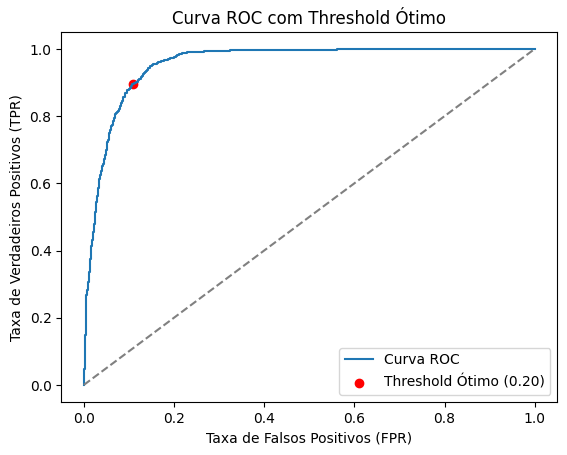

In [ ]:
# CALCULANDO AS MÉTRICAS

# Obter FPR, TPR e thresholds da curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)

# Calcular a distância do ponto ideal (0,1)
distances = np.sqrt((1 - tpr)**2 + fpr**2) #dist euclidiana do ponto ideal
optimal_idx = np.argmin(distances) # encontra o índice do menor valor no array distances, corresponde ao ponto mais próximo do ideal (0,1) na curva ROC.
optimal_threshold = thresholds[optimal_idx]

print(f"Melhor Threshold: {optimal_threshold:.4f}")

# Visualizar a curva ROC e destacar o ponto ótimo
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label='Curva ROC')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Threshold Ótimo ({optimal_threshold:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC com Threshold Ótimo')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Aplicar o threshold ótimo para converter probabilidades em classes
y_pred_classes = (y_test_pred_proba >= optimal_threshold).astype(int)

# Calcular métricas
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precisão: 0.5126
Recall: 0.8955
F1-Score: 0.6520


AUC-ROC indica que houve uma boa distinção de classes, o que é legal pro problema de negócio.
Acredito que dentro de uma campanha o foco principal é acertar clientes que tenham potencial de conversão, pois perder um pouco com a comunicação de quem nao aceite nao gera tanto impacto que deixar de converter um cliente potêncial. Por isso, optei por plotar a curva roc e definir o ponto ótimo afim de maximizar o recall.

**CatBoost**

In [33]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.1 MB/s eta 0:00:00


In [29]:
# DEFININDO OS MELHORES HIPERPARÂMETROS POR MEIO DA FUNÇÃO 'objective'

from sklearn.model_selection import StratifiedKFold

def objective(trial, model_type, X_train, y_train):
    # Configuração do modelo baseado no tipo
    if model_type == "catboost":
        from catboost import CatBoostClassifier
        model = CatBoostClassifier(
            iterations=trial.suggest_int("iterations", 100, 500),
            depth=trial.suggest_int("depth", 3, 10),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 0.2),
            l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1.0, 10.0),
            random_strength=trial.suggest_float("random_strength", 0.0, 1.0),
            verbose=0,
            random_state=42
        )

    # K-Fold Cross-Validation
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    auc_scores = []

    for train_idx, val_idx in kf.split(X_train, y_train):
        # Separar treino e validação dentro do conjunto de treino
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Treinar o modelo
        model.fit(X_train_fold, y_train_fold)

        # Avaliar no conjunto de validação
        y_pred_proba = model.predict_proba(X_val_fold)[:, 1]
        auc_scores.append(roc_auc_score(y_val_fold, y_pred_proba))

    # Retornar a métrica média para o Optuna
    return np.mean(auc_scores)

In [34]:
# IMPLEMENTANDO A FUNÇÃO

import optuna

# Rodar o estudo para otimizar os hiperparâmetros
study_cat = optuna.create_study(direction="maximize")
study_cat.optimize(lambda trial: objective(trial, "catboost", X_train, y_train), n_trials=20)

# Exibir os melhores hiperparâmetros encontrados
best_params_cat = study_cat.best_params
print("Melhores Hiperparâmetros para CatBoost:", best_params_cat)

[I 2025-01-27 23:01:47,783] A new study created in memory with name: no-name-e6af97c0-3968-4956-9e74-0b230cc59146
[I 2025-01-27 23:02:49,384] Trial 0 finished with value: 0.9424169797577164 and parameters: {'iterations': 366, 'depth': 7, 'learning_rate': 0.17732376687516815, 'l2_leaf_reg': 1.1364006538012794, 'random_strength': 0.559411599830015}. Best is trial 0 with value: 0.9424169797577164.
[I 2025-01-27 23:03:01,625] Trial 1 finished with value: 0.9423876099049314 and parameters: {'iterations': 228, 'depth': 3, 'learning_rate': 0.05731853050567045, 'l2_leaf_reg': 7.344106881566287, 'random_strength': 0.030339817819373782}. Best is trial 0 with value: 0.9424169797577164.
[I 2025-01-27 23:03:54,523] Trial 2 finished with value: 0.947030521357157 and parameters: {'iterations': 425, 'depth': 9, 'learning_rate': 0.043621904842409666, 'l2_leaf_reg': 7.999081248194841, 'random_strength': 0.8825680372067818}. Best is trial 2 with value: 0.947030521357157.
[I 2025-01-27 23:05:36,003] Trial

Melhores Hiperparâmetros para CatBoost: {'iterations': 395, 'depth': 6, 'learning_rate': 0.031372048433809294, 'l2_leaf_reg': 7.000051554453176, 'random_strength': 0.4588706265391145}


In [35]:
# TREINAR O MODELO FINAL NO CONJUNTO DE TREINO COMPLETO E AVALIAR NO CONJUNTO DE TESTE

from catboost import CatBoostClassifier

# Treinar o modelo final com os melhores hiperparâmetros
final_cat_model = CatBoostClassifier(
    iterations=best_params_cat["iterations"],
    depth=best_params_cat["depth"],
    learning_rate=best_params_cat["learning_rate"],
    l2_leaf_reg=best_params_cat["l2_leaf_reg"],
    random_strength=best_params_cat["random_strength"],
    verbose=0,
    random_state=42
)
final_cat_model.fit(X_train, y_train)

# Avaliar no conjunto de teste
y_test_pred_proba = final_cat_model.predict_proba(X_test)[:, 1]
final_auc = roc_auc_score(y_test, y_test_pred_proba)
print(f"AUC-ROC no Conjunto de Teste: {final_auc:.4f}")

AUC-ROC no Conjunto de Teste: 0.9556


Melhor Threshold: 0.1447


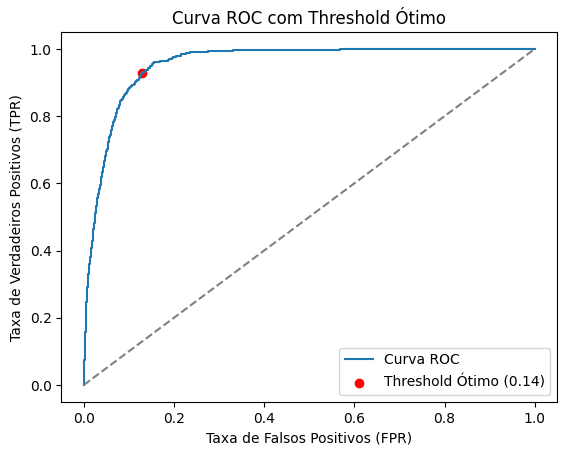

In [36]:
# CALCULANDO AS MÉTRICAS

# Obter FPR, TPR e thresholds da curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)

# Calcular a distância do ponto ideal (0,1)
distances = np.sqrt((1 - tpr)**2 + fpr**2) #dist euclidiana do ponto ideal
optimal_idx = np.argmin(distances) # encontra o índice do menor valor no array distances, corresponde ao ponto mais próximo do ideal (0,1) na curva ROC.
optimal_threshold = thresholds[optimal_idx]

print(f"Melhor Threshold: {optimal_threshold:.4f}")

# Visualizar a curva ROC e destacar o ponto ótimo
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label='Curva ROC')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Threshold Ótimo ({optimal_threshold:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC com Threshold Ótimo')
plt.legend(loc='lower right')
plt.show()

In [37]:
# Aplicar o threshold ótimo para converter probabilidades em classes
y_pred_classes = (y_test_pred_proba >= optimal_threshold).astype(int)

# Calcular métricas
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precisão: 0.4765
Recall: 0.9278
F1-Score: 0.6296


O Catboost apresentou melhor Recall que o XGboost, métrica importante para o problema entretanto as demais métricas foram bastante similar, perdendo para o xgboost no F1-Score.

**LightGBM**

In [38]:
!pip install lightgbm

In [39]:
# DEFININDO OS MELHORES HIPERPARÂMETROS POR MEIO DA FUNÇÃO 'objective'

from sklearn.model_selection import StratifiedKFold

def objective(trial, model_type, X_train, y_train):
    # Configuração do modelo baseado no tipo
    if model_type == "lightgbm":
        from lightgbm import LGBMClassifier
        model = LGBMClassifier(
            num_leaves=trial.suggest_int("num_leaves", 20, 50),
            max_depth=trial.suggest_int("max_depth", 3, 10),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 0.2),
            feature_fraction=trial.suggest_float("feature_fraction", 0.5, 1.0),
            bagging_fraction=trial.suggest_float("bagging_fraction", 0.5, 1.0),
            random_state=42
        )

    # K-Fold Cross-Validation
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    auc_scores = []

    for train_idx, val_idx in kf.split(X_train, y_train):
        # Separar treino e validação dentro do conjunto de treino
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Treinar o modelo
        model.fit(X_train_fold, y_train_fold)

        # Avaliar no conjunto de validação
        y_pred_proba = model.predict_proba(X_val_fold)[:, 1]
        auc_scores.append(roc_auc_score(y_val_fold, y_pred_proba))

    # Retornar a métrica média para o Optuna
    return np.mean(auc_scores)

In [40]:
# IMPLEMENTANDO A FUNÇÃO

import optuna

# Rodar o estudo para otimizar os hiperparâmetros
study_lgb = optuna.create_study(direction="maximize")
study_lgb.optimize(lambda trial: objective(trial, "lightgbm", X_train, y_train), n_trials=20)

# Exibir os melhores hiperparâmetros encontrados
best_params_lgb = study_lgb.best_params
print("Melhores Hiperparâmetros para LightGBM:", best_params_lgb)

[I 2025-01-27 23:21:50,455] A new study created in memory with name: no-name-7b27875f-0b61-44c2-9b00-11e3b8b4b36f
/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Warning] feature_fraction is set=0.931642560322128, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.931642560322128
[LightGBM] [Warning] bagging_fraction is set=0.9595022651523067, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9595022651523067
[LightGBM] [Warning] feature_fraction is set=0.931642560322128, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.931642560322128
[LightGBM] [Warning] bagging_fraction is set=0.9595022651523067, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9595022651523067
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 26360, number o

[I 2025-01-27 23:21:56,390] Trial 0 finished with value: 0.9466894231705358 and parameters: {'num_leaves': 47, 'max_depth': 3, 'learning_rate': 0.17358349076777718, 'feature_fraction': 0.931642560322128, 'bagging_fraction': 0.9595022651523067}. Best is trial 0 with value: 0.9466894231705358.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-27 23:21:59,126] Trial 1 finished with value: 0.9439787714160566 and parameters: {'num_leaves': 28, 'max_depth': 4, 'learning_rate': 0.03475413106403515, 'feature_fraction': 0.7031487646006648, 'bagging_fraction': 0.9621000356468257}. Best is trial 0 with value: 0.9466894231705358.


[LightGBM] [Warning] feature_fraction is set=0.7031487646006648, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7031487646006648
[LightGBM] [Warning] bagging_fraction is set=0.9621000356468257, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9621000356468257
[LightGBM] [Warning] feature_fraction is set=0.8374181780225731, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8374181780225731
[LightGBM] [Warning] bagging_fraction is set=0.8066704769348793, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8066704769348793
[LightGBM] [Warning] feature_fraction is set=0.8374181780225731, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8374181780225731
[LightGBM] [Warning] bagging_fraction is set=0.8066704769348793, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8066704769348793
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choo

[I 2025-01-27 23:22:02,128] Trial 2 finished with value: 0.9485650030366009 and parameters: {'num_leaves': 43, 'max_depth': 10, 'learning_rate': 0.021225090143564884, 'feature_fraction': 0.8374181780225731, 'bagging_fraction': 0.8066704769348793}. Best is trial 2 with value: 0.9485650030366009.


[LightGBM] [Warning] feature_fraction is set=0.8374181780225731, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8374181780225731
[LightGBM] [Warning] bagging_fraction is set=0.8066704769348793, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8066704769348793
[LightGBM] [Warning] feature_fraction is set=0.7524356089961193, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7524356089961193
[LightGBM] [Warning] bagging_fraction is set=0.5373654812904503, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5373654812904503
[LightGBM] [Warning] feature_fraction is set=0.7524356089961193, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7524356089961193
[LightGBM] [Warning] bagging_fraction is set=0.5373654812904503, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5373654812904503
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choo

[I 2025-01-27 23:22:04,764] Trial 3 finished with value: 0.9474076816322754 and parameters: {'num_leaves': 32, 'max_depth': 4, 'learning_rate': 0.1428044723481936, 'feature_fraction': 0.7524356089961193, 'bagging_fraction': 0.5373654812904503}. Best is trial 2 with value: 0.9485650030366009.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feat

[I 2025-01-27 23:22:09,044] Trial 4 finished with value: 0.9484155957273467 and parameters: {'num_leaves': 40, 'max_depth': 7, 'learning_rate': 0.057163050384054476, 'feature_fraction': 0.5998527955403139, 'bagging_fraction': 0.6632408626832326}. Best is trial 2 with value: 0.9485650030366009.


[LightGBM] [Warning] feature_fraction is set=0.7309629014002152, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7309629014002152
[LightGBM] [Warning] bagging_fraction is set=0.5860162465214657, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5860162465214657
[LightGBM] [Warning] feature_fraction is set=0.7309629014002152, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7309629014002152
[LightGBM] [Warning] bagging_fraction is set=0.5860162465214657, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5860162465214657
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 26360, numb

[I 2025-01-27 23:22:13,199] Trial 5 finished with value: 0.9469742176955229 and parameters: {'num_leaves': 48, 'max_depth': 8, 'learning_rate': 0.014053267494334427, 'feature_fraction': 0.7309629014002152, 'bagging_fraction': 0.5860162465214657}. Best is trial 2 with value: 0.9485650030366009.


[LightGBM] [Warning] feature_fraction is set=0.7309629014002152, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7309629014002152
[LightGBM] [Warning] bagging_fraction is set=0.5860162465214657, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5860162465214657
[LightGBM] [Warning] feature_fraction is set=0.9291738069622111, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9291738069622111
[LightGBM] [Warning] bagging_fraction is set=0.610734380619413, subsample=1.0 will be ignored. Current value: bagging_fraction=0.610734380619413
[LightGBM] [Warning] feature_fraction is set=0.9291738069622111, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9291738069622111
[LightGBM] [Warning] bagging_fraction is set=0.610734380619413, subsample=1.0 will be ignored. Current value: bagging_fraction=0.610734380619413
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing

[I 2025-01-27 23:22:15,606] Trial 6 finished with value: 0.9377050131784822 and parameters: {'num_leaves': 44, 'max_depth': 3, 'learning_rate': 0.015551016765092338, 'feature_fraction': 0.9291738069622111, 'bagging_fraction': 0.610734380619413}. Best is trial 2 with value: 0.9485650030366009.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-27 23:22:18,431] Trial 7 finished with value: 0.9470146089250051 and parameters: {'num_leaves': 24, 'max_depth': 5, 'learning_rate': 0.1590573883896326, 'feature_fraction': 0.66004724044246, 'bagging_fraction': 0.682505504956755}. Best is trial 2 with value: 0.9485650030366009.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.66004724044246, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.66004724044246
[LightGBM] [Warning] bagging_fraction is set=0.682505504956755, subsample=1.0 will be ignored. Current value: bagging_fraction=0.682505504956755
[LightGBM] [Warning] feature_fraction is set=0.5032748064986361, colsample_bytree=1.0 will be ignored. Cu

[I 2025-01-27 23:22:22,026] Trial 8 finished with value: 0.9475810212220404 and parameters: {'num_leaves': 29, 'max_depth': 5, 'learning_rate': 0.08537896771678824, 'feature_fraction': 0.5032748064986361, 'bagging_fraction': 0.9604280984934268}. Best is trial 2 with value: 0.9485650030366009.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feat

[I 2025-01-27 23:22:26,136] Trial 9 finished with value: 0.9470000784468542 and parameters: {'num_leaves': 27, 'max_depth': 4, 'learning_rate': 0.1437029279774265, 'feature_fraction': 0.7497567880529737, 'bagging_fraction': 0.5970476836062414}. Best is trial 2 with value: 0.9485650030366009.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.7497567880529737, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7497567880529737
[LightGBM] [Warning] bagging_fraction is set=0.5970476836062414, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5970476836062414
[LightGBM] [Warning] feature_fraction is set=0.8805395604324429, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8805395604324429
[LightGBM] [Warning] bagging_fraction is set=0.8175034748856886, subsample=1.0 will be ignored.

[I 2025-01-27 23:22:30,263] Trial 10 finished with value: 0.947970213920542 and parameters: {'num_leaves': 37, 'max_depth': 10, 'learning_rate': 0.09274001910490091, 'feature_fraction': 0.8805395604324429, 'bagging_fraction': 0.8175034748856886}. Best is trial 2 with value: 0.9485650030366009.


[LightGBM] [Warning] feature_fraction is set=0.8805395604324429, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8805395604324429
[LightGBM] [Warning] bagging_fraction is set=0.8175034748856886, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8175034748856886
[LightGBM] [Warning] feature_fraction is set=0.5685915084807033, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5685915084807033
[LightGBM] [Warning] bagging_fraction is set=0.8083464395061379, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8083464395061379
[LightGBM] [Warning] feature_fraction is set=0.5685915084807033, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5685915084807033
[LightGBM] [Warning] bagging_fraction is set=0.8083464395061379, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8083464395061379
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choo

[I 2025-01-27 23:22:35,140] Trial 11 finished with value: 0.9486773064849157 and parameters: {'num_leaves': 39, 'max_depth': 8, 'learning_rate': 0.05261858918901032, 'feature_fraction': 0.5685915084807033, 'bagging_fraction': 0.8083464395061379}. Best is trial 11 with value: 0.9486773064849157.


[LightGBM] [Warning] feature_fraction is set=0.5685915084807033, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5685915084807033
[LightGBM] [Warning] bagging_fraction is set=0.8083464395061379, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8083464395061379
[LightGBM] [Warning] feature_fraction is set=0.839194422583218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.839194422583218
[LightGBM] [Warning] bagging_fraction is set=0.8260765135836107, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8260765135836107
[LightGBM] [Warning] feature_fraction is set=0.839194422583218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.839194422583218
[LightGBM] [Warning] bagging_fraction is set=0.8260765135836107, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8260765135836107
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing

[I 2025-01-27 23:22:38,449] Trial 12 finished with value: 0.9487096215058844 and parameters: {'num_leaves': 41, 'max_depth': 10, 'learning_rate': 0.05767416396900731, 'feature_fraction': 0.839194422583218, 'bagging_fraction': 0.8260765135836107}. Best is trial 12 with value: 0.9487096215058844.


[LightGBM] [Warning] feature_fraction is set=0.839194422583218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.839194422583218
[LightGBM] [Warning] bagging_fraction is set=0.8260765135836107, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8260765135836107
[LightGBM] [Warning] feature_fraction is set=0.5254422328981929, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5254422328981929
[LightGBM] [Warning] bagging_fraction is set=0.851032592930762, subsample=1.0 will be ignored. Current value: bagging_fraction=0.851032592930762
[LightGBM] [Warning] feature_fraction is set=0.5254422328981929, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5254422328981929
[LightGBM] [Warning] bagging_fraction is set=0.851032592930762, subsample=1.0 will be ignored. Current value: bagging_fraction=0.851032592930762
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing r

[I 2025-01-27 23:22:43,858] Trial 13 finished with value: 0.9487233639898275 and parameters: {'num_leaves': 36, 'max_depth': 9, 'learning_rate': 0.05912748786229231, 'feature_fraction': 0.5254422328981929, 'bagging_fraction': 0.851032592930762}. Best is trial 13 with value: 0.9487233639898275.


[LightGBM] [Warning] feature_fraction is set=0.5254422328981929, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5254422328981929
[LightGBM] [Warning] bagging_fraction is set=0.851032592930762, subsample=1.0 will be ignored. Current value: bagging_fraction=0.851032592930762
[LightGBM] [Warning] feature_fraction is set=0.8087204559820621, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8087204559820621
[LightGBM] [Warning] bagging_fraction is set=0.8771697184223779, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8771697184223779
[LightGBM] [Warning] feature_fraction is set=0.8087204559820621, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8087204559820621
[LightGBM] [Warning] bagging_fraction is set=0.8771697184223779, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8771697184223779
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosi

[I 2025-01-27 23:22:47,290] Trial 14 finished with value: 0.9486498562597985 and parameters: {'num_leaves': 34, 'max_depth': 9, 'learning_rate': 0.069823500672255, 'feature_fraction': 0.8087204559820621, 'bagging_fraction': 0.8771697184223779}. Best is trial 13 with value: 0.9487233639898275.


[LightGBM] [Warning] feature_fraction is set=0.8087204559820621, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8087204559820621
[LightGBM] [Warning] bagging_fraction is set=0.8771697184223779, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8771697184223779
[LightGBM] [Warning] feature_fraction is set=0.814075997387503, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.814075997387503
[LightGBM] [Warning] bagging_fraction is set=0.7336548174331605, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7336548174331605
[LightGBM] [Warning] feature_fraction is set=0.814075997387503, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.814075997387503
[LightGBM] [Warning] bagging_fraction is set=0.7336548174331605, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7336548174331605
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing

[I 2025-01-27 23:22:49,755] Trial 15 finished with value: 0.9481113314050568 and parameters: {'num_leaves': 21, 'max_depth': 9, 'learning_rate': 0.11663481477621294, 'feature_fraction': 0.814075997387503, 'bagging_fraction': 0.7336548174331605}. Best is trial 13 with value: 0.9487233639898275.


[LightGBM] [Warning] feature_fraction is set=0.814075997387503, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.814075997387503
[LightGBM] [Warning] bagging_fraction is set=0.7336548174331605, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7336548174331605
[LightGBM] [Warning] feature_fraction is set=0.6490729818521684, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6490729818521684
[LightGBM] [Warning] bagging_fraction is set=0.8867330456218969, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8867330456218969
[LightGBM] [Warning] feature_fraction is set=0.6490729818521684, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6490729818521684
[LightGBM] [Warning] bagging_fraction is set=0.8867330456218969, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8867330456218969
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosi

[I 2025-01-27 23:22:52,948] Trial 16 finished with value: 0.9488752642057785 and parameters: {'num_leaves': 43, 'max_depth': 9, 'learning_rate': 0.04430788693953391, 'feature_fraction': 0.6490729818521684, 'bagging_fraction': 0.8867330456218969}. Best is trial 16 with value: 0.9488752642057785.


[LightGBM] [Warning] feature_fraction is set=0.6490729818521684, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6490729818521684
[LightGBM] [Warning] bagging_fraction is set=0.8867330456218969, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8867330456218969
[LightGBM] [Warning] feature_fraction is set=0.5007458039902547, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5007458039902547
[LightGBM] [Warning] bagging_fraction is set=0.8924864739505403, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8924864739505403
[LightGBM] [Warning] feature_fraction is set=0.5007458039902547, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5007458039902547
[LightGBM] [Warning] bagging_fraction is set=0.8924864739505403, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8924864739505403
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choo

[I 2025-01-27 23:22:56,915] Trial 17 finished with value: 0.9474441665036657 and parameters: {'num_leaves': 50, 'max_depth': 7, 'learning_rate': 0.1153981335291997, 'feature_fraction': 0.5007458039902547, 'bagging_fraction': 0.8924864739505403}. Best is trial 16 with value: 0.9488752642057785.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.5007458039902547, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5007458039902547
[LightGBM] [Warning] bagging_fraction is set=0.8924864739505403, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8924864739505403
[LightGBM] [Warning] feature_fraction is set=0.6050779371422443, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6050779371422443
[LightGBM] [Warning] bagging_fraction is set=0.8963993942817139, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8963993942817139
[LightGBM] [Warning] feature_fraction is set=0.6050779371422443, colsample_bytree=1.0 will be igno

[I 2025-01-27 23:23:01,516] Trial 18 finished with value: 0.9484212634118832 and parameters: {'num_leaves': 35, 'max_depth': 8, 'learning_rate': 0.037836134329186824, 'feature_fraction': 0.6050779371422443, 'bagging_fraction': 0.8963993942817139}. Best is trial 16 with value: 0.9488752642057785.


[LightGBM] [Warning] feature_fraction is set=0.6050779371422443, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6050779371422443
[LightGBM] [Warning] bagging_fraction is set=0.8963993942817139, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8963993942817139
[LightGBM] [Warning] feature_fraction is set=0.6608343625970894, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6608343625970894
[LightGBM] [Warning] bagging_fraction is set=0.7544838439360018, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7544838439360018
[LightGBM] [Warning] feature_fraction is set=0.6608343625970894, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6608343625970894
[LightGBM] [Warning] bagging_fraction is set=0.7544838439360018, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7544838439360018
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choo

[I 2025-01-27 23:23:04,749] Trial 19 finished with value: 0.9483290199277198 and parameters: {'num_leaves': 45, 'max_depth': 9, 'learning_rate': 0.08757382870780425, 'feature_fraction': 0.6608343625970894, 'bagging_fraction': 0.7544838439360018}. Best is trial 16 with value: 0.9488752642057785.


[LightGBM] [Warning] feature_fraction is set=0.6608343625970894, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6608343625970894
[LightGBM] [Warning] bagging_fraction is set=0.7544838439360018, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7544838439360018
Melhores Hiperparâmetros para LightGBM: {'num_leaves': 43, 'max_depth': 9, 'learning_rate': 0.04430788693953391, 'feature_fraction': 0.6490729818521684, 'bagging_fraction': 0.8867330456218969}


In [41]:
# TREINAR O MODELO FINAL NO CONJUNTO DE TREINO COMPLETO E AVALIAR NO CONJUNTO DE TESTE

from lightgbm import LGBMClassifier

# Treinar o modelo final com os melhores hiperparâmetros
final_lgb_model = LGBMClassifier(
    num_leaves=best_params_lgb["num_leaves"],
    max_depth=best_params_lgb["max_depth"],
    learning_rate=best_params_lgb["learning_rate"],
    feature_fraction=best_params_lgb["feature_fraction"],
    bagging_fraction=best_params_lgb["bagging_fraction"],
    random_state=42
)
final_lgb_model.fit(X_train, y_train)

# Avaliar no conjunto de teste
y_test_pred_proba = final_lgb_model.predict_proba(X_test)[:, 1]
final_auc = roc_auc_score(y_test, y_test_pred_proba)
print(f"AUC-ROC no Conjunto de Teste: {final_auc:.4f}")


[LightGBM] [Warning] feature_fraction is set=0.6490729818521684, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6490729818521684
[LightGBM] [Warning] bagging_fraction is set=0.8867330456218969, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8867330456218969
[LightGBM] [Warning] feature_fraction is set=0.6490729818521684, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6490729818521684
[LightGBM] [Warning] bagging_fraction is set=0.8867330456218969, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8867330456218969
[LightGBM] [Info] Number of positive: 3712, number of negative: 29238
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 32950, numb

Melhor Threshold: 0.1623


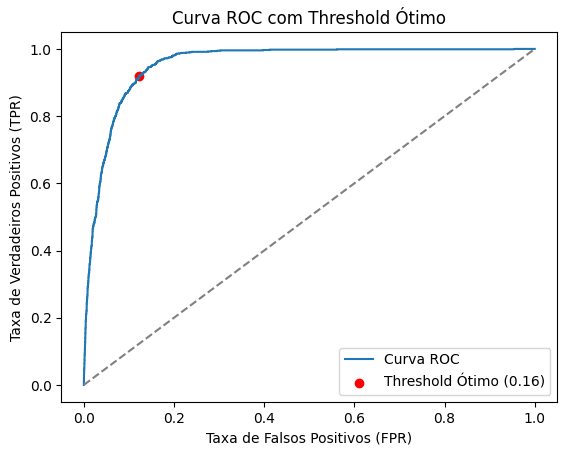

In [42]:
# CALCULANDO AS MÉTRICAS

# Obter FPR, TPR e thresholds da curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)

# Calcular a distância do ponto ideal (0,1)
distances = np.sqrt((1 - tpr)**2 + fpr**2) #dist euclidiana do ponto ideal
optimal_idx = np.argmin(distances) # encontra o índice do menor valor no array distances, corresponde ao ponto mais próximo do ideal (0,1) na curva ROC.
optimal_threshold = thresholds[optimal_idx]

print(f"Melhor Threshold: {optimal_threshold:.4f}")

# Visualizar a curva ROC e destacar o ponto ótimo
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label='Curva ROC')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Threshold Ótimo ({optimal_threshold:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC com Threshold Ótimo')
plt.legend(loc='lower right')
plt.show()

In [43]:
# Aplicar o threshold ótimo para converter probabilidades em classes
y_pred_classes = (y_test_pred_proba >= optimal_threshold).astype(int)

# Calcular métricas
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precisão: 0.4869
Recall: 0.9203
F1-Score: 0.6368


Como a auc-roc foi a mesma para os três modelos utilizando a otimização de hiperparâmetros, e tendo em vista que o acerto de TP é muito importante para identificação de clientes potênciais eu optaria pelo LightGBM visto que se mostrou eficiente no Recall e teve o melhor F1-Score.

**Utilizando Pycaret**

In [44]:
# Instalar a biblioteca (caso não esteja instalada)
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 39.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.8 MB/s eta 0:00:00
  Preparing met

In [24]:
# Importar as bibliotecas necessárias
from pycaret.classification import *

In [25]:
# Carregar um conjunto de dados de exemplo
#from pycaret.datasets import get_data
#data = get_data('titanic')  # Dataset de sobreviventes do Titanic

# Configurar o ambiente do PyCaret
setup(
    data=df_cleaned,
    target='y',  # Coluna de alvo
    session_id=42,      # Reprodutibilidade
    categorical_features= ['housing','loan','contact']  # Identificar colunas categóricas
)

# Comparar modelos
best_model = compare_models()

# Mostrar o melhor modelo
print("Melhor modelo:", best_model)

,Description,Value
0,Session id,42
1,Target,y
2,Target type,Binary
3,Original data shape,"(41188, 20)"
4,Transformed data shape,"(41188, 20)"
5,Transformed train set shape,"(28831, 20)"
6,Transformed test set shape,"(12357, 20)"
7,Numeric features,12
8,Categorical features,3
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9154,0.9486,0.5413,0.6498,0.5904,0.5437,0.5467,5.1920
dummy,Dummy Classifier,0.8873,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3210


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

Melhor modelo: LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)
